# SMS Spam Classifier using NLP (Bag of Words and TF-IDF) and Naive Bayes

In [2]:
## Importing Libraries
import pandas as  pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
messages = pd.read_csv('SMSSpamCollection',sep='\t', names=["label","message"])

In [21]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
corpus = []

In [9]:
## Cleaning the text
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review = review.lower()
    review = review.split() # we are getting List of words
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    
    corpus.append(review)

# Bag of Words

In [10]:
## Bag of words for vectorization 

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000) ## set maximum feature limit equal to 5000
x = cv.fit_transform(corpus).toarray()  ## Converting corpus into array 

In [23]:
## Select label as Dependent variable
y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [12]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# Create classification Model using Naive Bayes

In [13]:
## Training Model using Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)

y_pred = spam_detect_model.predict(x_test)

In [15]:
#Compute model performance
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)

0.9820627802690582


Text(0.5, 1.0, 'Confusion Matrix')

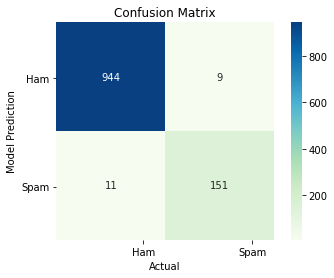

In [33]:
## Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(cm, cmap=plt.cm.GnBu, annot=True, square=True, fmt='d' )

class_labels = ['Ham', 'Spam']

axes.set_xlabel("Actual")
axes.set_ylabel("Model Prediction")

tick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(tick_marks+0.3)
axes.set_xticklabels(class_labels, rotation=0)

axes.set_yticks(tick_marks+0.01)
axes.set_yticklabels(class_labels, rotation=0)
axes.set_title("Confusion Matrix")

# Classification using TF-IDF for Vectorization

In [34]:
##Creating the TF_IDF Model
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf  = TfidfVectorizer()
x_tfidf = cv_tfidf.fit_transform(corpus).toarray()

In [35]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
## Select label as Dependent variable
y_tfidf = pd.get_dummies(messages['label'])
y_tfidf = y_tfidf.iloc[:,1].values
y_tfidf

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [38]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tfidf,y_tfidf,test_size=0.25, random_state=0)

In [42]:
## Training Model using Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)

y_pred_tfidf = spam_detect_model.predict(x_test)

In [44]:
#Compute model performance
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_pred_tfidf, y_test))
cm_tfidf = confusion_matrix(y_pred_tfidf, y_test)

0.9712849964106246


Text(0.5, 1.0, 'Confusion Matrix TF-IDF')

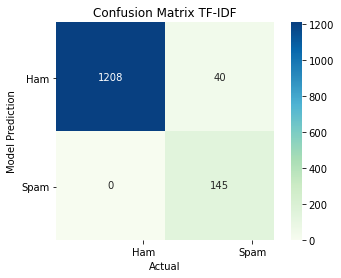

In [46]:
## Confusion matrix TF-IDF
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(cm_tfidf, cmap=plt.cm.GnBu, annot=True, square=True, fmt='d' )

class_labels = ['Ham', 'Spam']

axes.set_xlabel("Actual")
axes.set_ylabel("Model Prediction")

tick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(tick_marks+0.3)
axes.set_xticklabels(class_labels, rotation=0)

axes.set_yticks(tick_marks+0.01)
axes.set_yticklabels(class_labels, rotation=0)
axes.set_title("Confusion Matrix TF-IDF")